In [207]:
%matplotlib notebook

from modsim import *

In [208]:
m = UNITS.meters
s = UNITS.seconds

In [209]:
condition = Condition(floorheight = 3 *m,
                     num_floors = 1,
                     v_max = .762 * m / s,
                     a_max = .65 * m / s ** 2)

In [210]:
def find_magic_num(v_max, a_max):
    t = v_max / a_max
    num_magic = .5 * a_max * t **2 + v_max * t
    return num_magic

In [211]:
find_magic_num(condition.v_max, condition.a_max)

<Quantity(1.3399476923076923, 'meter')>

In [217]:
def make_system(condition):
    unpack(condition)
    height = floorheight * num_floors
    init = State(y = 0 * m, vy = 0 * m / s)
    ts = linspace(0,10,401)
    magic_num = find_magic_num(v_max, a_max)
    return System(init = init,finished = False, a_max = a_max, v_max = v_max, magic_num = magic_num, height = height, ts = ts)

    

In [218]:
system = make_system(condition)
system.finished

False

In [224]:
def slope_func(state, t, system):
    unpack(system)
    y, vy = state
    ay = a_max
    if(system.finished == True):
        return 0,0
    if(vy > v_max):
        ay = 0
        vy = v_max
    if(y >= height):
        system.finished = True
    if(height - y <= magic_num):
        ay = -a_max
    dy = vy
    dv = ay
    
    return dy,dv
    

In [225]:
run_odeint(system, slope_func)

<IPython.core.display.Javascript object>


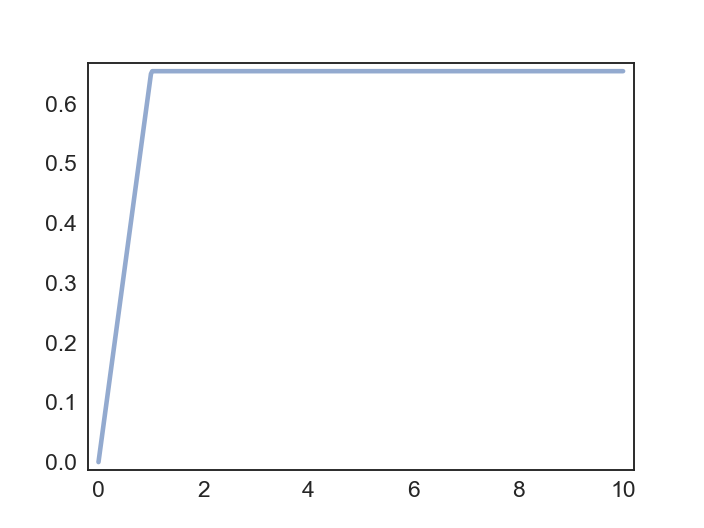

In [232]:
plot(system.results.vy)